In [15]:
import sys
sys.path.append('../../component')
from utils import *
from run_LSTM import set_lstm_data, run_lstm, lstm_eval
from run_Transformer import set_trans_data, run_transformer, transformer_eval
from run_EDA import run_eda
import os
os.getcwd()

'/home/ubuntu/Capstone_Group_1/code/main_code/test'

In [16]:
'''EDA'''
path = '../../data/air_pollution.csv'
target = 'pollution'
ts_plt, acf, acf_pacf, rolling_mean_var, decomposition = run_eda(path, 100, 24)

In [17]:
df_train, df_test, train, test = prepare_arima_data(path, target)
print('Train shape', train.shape, '\nTest shape', test.shape)

Train shape (35040, 1) 
Test shape (8760, 1)


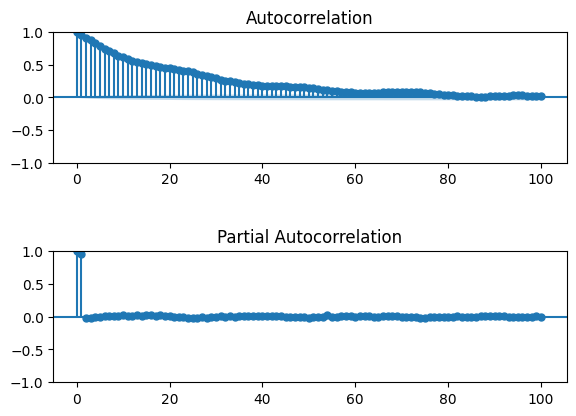

In [6]:
acf_pacf

In [ ]:
# Optuna to find AR order
study_ar, best_order_list_ar = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=None, integ_max=None,
                                                   objective=ARIMA_objective, n_trials=20)
# ar=5

In [ ]:
# Optuna to find MA order
study_ma, best_order_list_ma = optuna_search_ARIMA(train, test,
                                                   ar_max=None, ma_max=10, integ_max=None,
                                                   objective=ARIMA_objective, n_trials=10)
# ma= 20

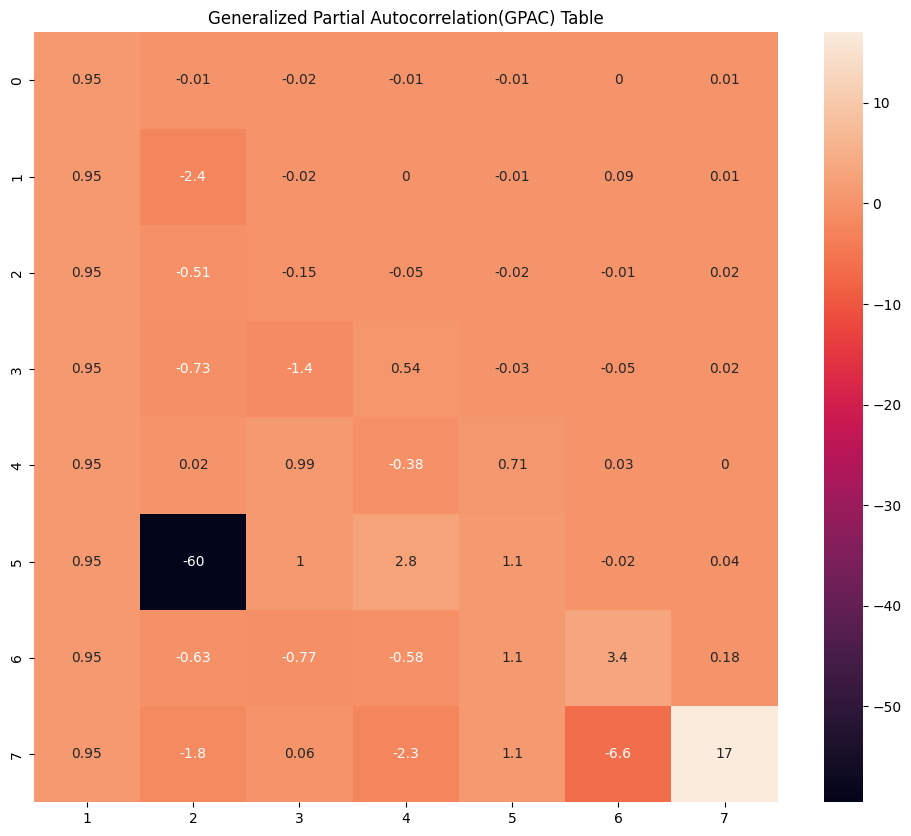

In [18]:
fig = GPAC_table(train, J=8, K=8) 
fig.savefig('../main/pdf/air_1.pdf', dpi=300, bbox_inches="tight")

In [ ]:
# Optuna to find ARMA order
study_arma, best_order_list_arma = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=10, integ_max=None,
                                                   objective=ARIMA_objective, n_trials=30)
# arma = (2,6)

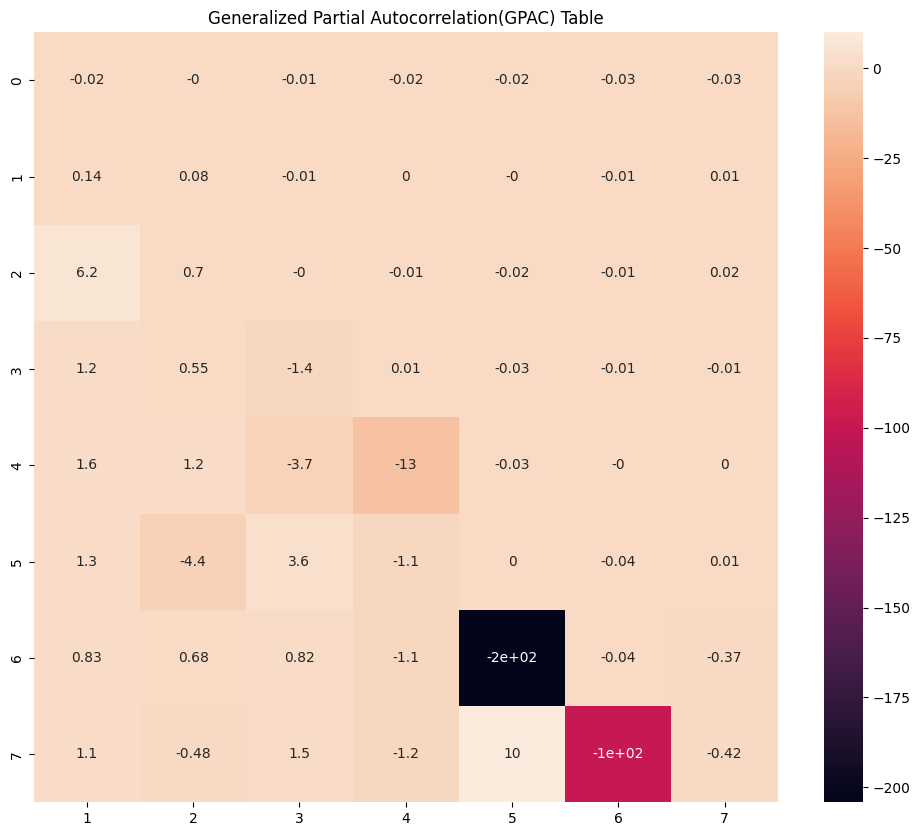

In [20]:
# perform a fist-order differencing than GPAC
diff = differencing(df_train, 1, 'pollution')
diff_data = np.array(diff).reshape(-1, 1)
fig = GPAC_table(diff_data, J=8, K=8)
fig.savefig('../main/pdf/air_2.pdf', dpi=300, bbox_inches="tight")

In [ ]:
# Optuna to find ARIMA order
study_arima, best_order_list_arima = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=20, integ_max=1,
                                                   objective=ARIMA_objective, n_trials=30)
# arima(10, 1, 12)

In [10]:
target = 'pollution'
dataset = 'air'
seq_length = 6

In [11]:
# LSTM
model_name = 'lstm'

train_loader, test_loader, scaler, actual_test = set_lstm_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.01438847
Epoch [11/100], Loss: 0.00318196
Epoch [21/100], Loss: 0.00306295
Epoch [31/100], Loss: 0.00305557
Epoch [41/100], Loss: 0.00304261
Epoch [51/100], Loss: 0.00302920
Epoch [61/100], Loss: 0.00302273
Epoch [71/100], Loss: 0.00301390
Epoch [81/100], Loss: 0.00300194
Epoch [91/100], Loss: 0.00299915
loss: 0.0022957302272265806


567.47565

In [12]:
# BiLSTM
model_name='Bilstm'

train_loader, test_loader, scaler, actual_test = set_lstm_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.00963149
Epoch [11/100], Loss: 0.00313107
Epoch [21/100], Loss: 0.00310238
Epoch [31/100], Loss: 0.00309026
Epoch [41/100], Loss: 0.00307728
Epoch [51/100], Loss: 0.00307343
Epoch [61/100], Loss: 0.00305331
Epoch [71/100], Loss: 0.00303812
Epoch [81/100], Loss: 0.00302463
Epoch [91/100], Loss: 0.00300507
loss: 0.0022972918071689596


567.9334

In [13]:
# Seq2seq
model_name='seq2seq'

train_loader, test_loader, scaler, actual_test = set_lstm_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.34700999
Epoch [11/100], Loss: 0.00701344
Epoch [21/100], Loss: 0.00319047
Epoch [31/100], Loss: 0.00307617
Epoch [41/100], Loss: 0.00303145
Epoch [51/100], Loss: 0.00299288
Epoch [61/100], Loss: 0.00297894
Epoch [71/100], Loss: 0.00295444
Epoch [81/100], Loss: 0.00295331
Epoch [91/100], Loss: 0.00294283
loss: 0.0022719858646176863


561.4092

In [14]:
# transformer
epoches = 100
batch_size = 128

train_loader, test_loader, scaler, actual_test = set_trans_data(path, target, seq_length, batch_size)
model = run_transformer(dataset, train_loader, epoches)
predictions = transformer_eval(dataset, model, test_loader, scaler)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/100], Loss: 0.15204365
Epoch [2/100], Loss: 0.11337165
Epoch [3/100], Loss: 0.11220503
Epoch [4/100], Loss: 0.10771646
Epoch [5/100], Loss: 0.10975426
Epoch [6/100], Loss: 0.10838039
Epoch [7/100], Loss: 0.10729875
Epoch [8/100], Loss: 0.10694123
Epoch [9/100], Loss: 0.10787284
Epoch [10/100], Loss: 0.10622192
Epoch [11/100], Loss: 0.10556160
Epoch [12/100], Loss: 0.10540753
Epoch [13/100], Loss: 0.10694096
Epoch [14/100], Loss: 0.10476805
Epoch [15/100], Loss: 0.10369814
Epoch [16/100], Loss: 0.10367380
Epoch [17/100], Loss: 0.10488451
Epoch [18/100], Loss: 0.10390893
Epoch [19/100], Loss: 0.10387128
Epoch [20/100], Loss: 0.10222879
Epoch [21/100], Loss: 0.10371196
Epoch [22/100], Loss: 0.10267240
Epoch [23/100], Loss: 0.10233315
Epoch [24/100], Loss: 0.10269421
Epoch [25/100], Loss: 0.10348417
Epoch [26/100], Loss: 0.10139573
Epoch [27/100], Loss: 0.10192014
Epoch [28/100], Loss: 0.10295502
Epoch [29/100], Loss: 0.10174821
Epoch [30/100], Loss: 0.10107213
Epoch [31/100], Los